# Análisis de Datos de Vehículos y Modelado Predictivo

Este cuaderno contiene un análisis exploratorio de datos y un modelo predictivo para estimar el precio de venta de vehículos basado en las características proporcionadas.

## 1. Carga de Datos

Primero, cargamos el dataset y observamos sus primeras filas y su estructura.


In [129]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

import pandas as pd

# Cargar el dataset
data = pd.read_csv('nuevo_dataset_20000.csv')
data.head()

,year,make,model,trim,body,transmission,state,condition,odometer,mmr,sellingprice
0,2014,Chevrolet,Impala Limited,LT Fleet,Sedan,automatic,fl,4.0,21507.0,13450.0,13800.0
1,2003,Dodge,Ram Pickup 1500,SLT,Quad Cab,NaN,mo,31.0,79712.0,6025.0,6300.0
2,2007,Pontiac,G6,GT,Convertible,automatic,nj,34.0,65698.0,7375.0,8000.0
3,2011,Toyota,Corolla,LE,Sedan,automatic,fl,43.0,23634.0,10800.0,11400.0
4,2012,Lexus,ES 350,Base,Sedan,NaN,pa,35.0,26483.0,22500.0,23300.0


## 2. Limpieza de Datos
Se identifican y manejan los valores nulos, y se transforman algunas columnas para que puedan ser utilizadas en el modelo predictivo.

In [130]:
# Mostrar información del dataset
#data.info()

# Eliminar las columnas directamente
data_clean = data.drop(['make', 'model', 'trim', 'body', 'transmission', 'state'], axis=1)

print(data_clean.isnull().sum())

data_clean = data_clean.dropna(subset=['condition', 'odometer', 'mmr'])

print(data_clean.isnull().sum())




# Mostrar el DataFrame resultante
print(data_clean.head())

num_filas = data_clean.shape[0]

print("Número total de filas:", num_filas)

year              0
condition       436
odometer          3
mmr               1
sellingprice      0
dtype: int64
year            0
condition       0
odometer        0
mmr             0
sellingprice    0
dtype: int64
   year  condition  odometer      mmr  sellingprice
0  2014        4.0   21507.0  13450.0       13800.0
1  2003       31.0   79712.0   6025.0        6300.0
2  2007       34.0   65698.0   7375.0        8000.0
3  2011       43.0   23634.0  10800.0       11400.0
4  2012       35.0   26483.0  22500.0       23300.0
Número total de filas: 19562


## 3. Análisis Exploratorio
Visualización y análisis de las principales características del dataset.

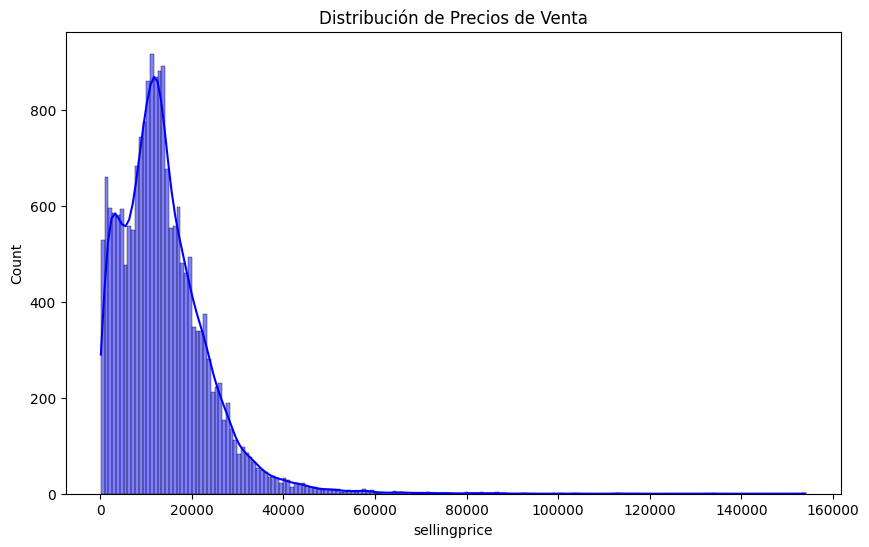

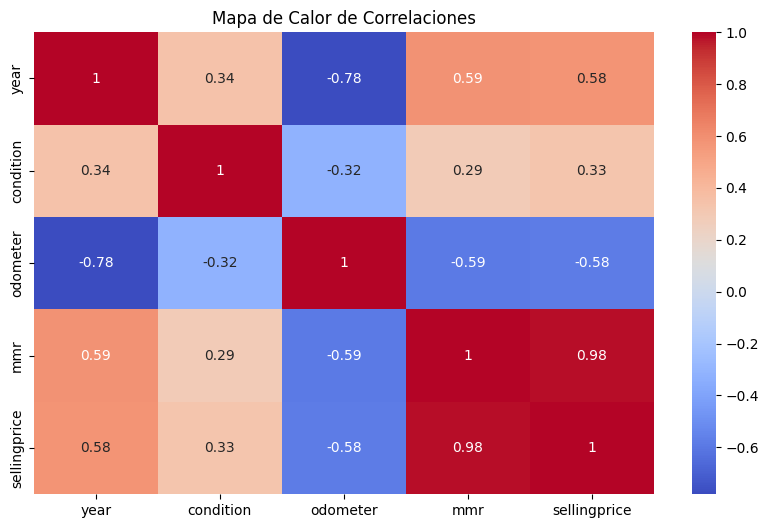

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribución de precios de venta
plt.figure(figsize=(10,6))
sns.histplot(data_clean['sellingprice'], kde=True, color='blue')
plt.title('Distribución de Precios de Venta')
plt.show()

# Correlaciones entre características numéricas
plt.figure(figsize=(10,6))
sns.heatmap(data_clean.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlaciones')
plt.show()

## 4. Preparación de Datos para el Modelo
Se preparan las características y la variable objetivo para entrenar el modelo de regresión lineal.

In [132]:
# Selección de características relevantes
features = ['year', 'odometer', 'mmr', 'condition']
X = data_clean[features]
y = data_clean['sellingprice']

# Encontrar los índices de los 1,000 valores más altos en X
num_to_remove = 9000
indices_of_top = np.argsort(X)[-num_to_remove:]  # Índices de los valores más altos

# Eliminar los valores en esas posiciones de X y y
mask = np.ones(len(X), dtype=bool)
mask[indices_of_top] = False

X_filtered = X[mask]
y_filtered = y[mask]

# División del dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=500/20000, random_state=42)

## 5. Modelo de Regresión Lineal multivariable
Entrenamiento del modelo y evaluación de su desempeño.

In [133]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J


In [134]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente

    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

In [135]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [136]:
# llama featureNormalize con los datos cargados
X_train_scaled, mu_t, sigma_t = featureNormalize(X_train)

# llama featureNormalize con los datos cargados
X_test_scaled, mu, sigma = featureNormalize(X_test)

print('Media calculada:', mu_t)
print('Desviación estandar calculada:', sigma_t)

print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)

Media calculada: year          2010.163826
odometer     66580.883843
mmr          13941.050920
condition       30.706172
dtype: float64
Desviación estandar calculada: year             3.909165
odometer     52430.378024
mmr           9697.261690
condition       13.516389
dtype: float64
Media calculada: year          2010.089980
odometer     66847.599182
mmr          13766.155419
condition       31.145194
dtype: float64
Desviación estandar calculada: year             3.863214
odometer     52030.124770
mmr           9426.784911
condition       13.225331
dtype: float64


In [137]:
'''
from sklearn.preprocessing import StandardScaler

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
'''

'\nfrom sklearn.preprocessing import StandardScaler\n\n# Normalizar los datos\nscaler = StandardScaler()\nX_train_scaled = scaler.fit_transform(X_train)\nX_test_scaled = scaler.transform(X_test)\n'

In [138]:
# Agregar una columna de unos para el término independiente
X_train_scaled = np.hstack((np.ones((X_train_scaled.shape[0], 1)), X_train_scaled))
X_test_scaled = np.hstack((np.ones((X_test_scaled.shape[0], 1)), X_test_scaled))



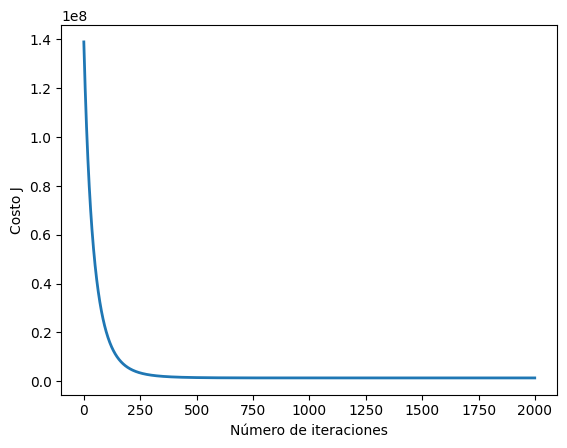

Error cuadrático medio (MSE): 127129638.86360872
Coeficiente de determinación R²): -0.43202806693063733
Dimensiones de theta: (5,)
theta calculado por el descenso por el gradiente: [13783.71249201  -166.44561176   -55.80476918  9507.5294653
   533.88731633]
[1.000e+00 2.022e+03 2.000e+02 8.000e+03 5.000e+01]
[ 1.          3.02780141 -1.26607677 -0.61265243  1.42743946]
Precio predicho para el nuevo auto: 8287.682167864103


In [139]:
# Parámetros para el descenso de gradiente
alpha = 0.01  # Tasa de aprendizaje
num_iters = 2000  # Número de iteraciones

# Inicializar theta y ejecutar el descenso por gradiente

# Añadir una dimensión a theta
theta = np.zeros(X_train_scaled.shape[1])
theta, J_history = gradientDescentMulti(X_train_scaled, y_train, theta, alpha, num_iters)

# Graficar la convergencia del costo
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Número de iteraciones')
plt.ylabel('Costo J')
plt.show()

nuevo_orden = [0, 1, 3, 4, 2]

# Aplicar el nuevo orden a las columnas
X_test_scaled1 = X_test_scaled[:, nuevo_orden]
#print(X_test_scaled)
# Hacer predicciones en el conjunto de prueba
y_pred = np.dot(X_test_scaled1, theta)


#print(y_test)

#print(y_pred)


# Evaluar el modelo
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación R²):", r2)



# Predecir el precio para un nuevo auto
nuevo_auto = np.array([1, 2022 , 200.0 , 8000.0, 50.0])

#print("Dimensiones de X_train:", X_train.shape)
#print("Dimensiones de nuevo_auto:", nuevo_auto.shape)
print("Dimensiones de theta:", theta.shape)
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

print(nuevo_auto)
# Ajusta los valores según tus características
nuevo_auto[1:5] = (nuevo_auto[1:5] - mu_t) / sigma_t

print(nuevo_auto)
#nuevo_auto_scaled = np.insert(nuevo_auto_scaled, 0, 1)
precio_predicho = np.dot(nuevo_auto, theta)
print("Precio predicho para el nuevo auto:", precio_predicho)

## Regresion polinomial

In [140]:
X = data_clean.iloc[:, 0].values  # Primera columna, años
y = data_clean.iloc[:, 4].values  # Segunda columna, Precio de venta


X_a = np.array(X)
y_a = np.array(y)


print(X_a)

print(y_a)

[2014 2003 2007 ... 2013 2013 2011]
[13800.  6300.  8000. ... 27300. 45000. 18600.]


In [141]:
from matplotlib import pyplot
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva.

    fig = pyplot.figure()  # abre una nueva figura

    pyplot.plot(x, y, 'ro', ms=2, mec='k')
    pyplot.ylabel('Precio de venta')
    pyplot.xlabel('Año')
    pyplot.title('Relacion de precio de venta con año')

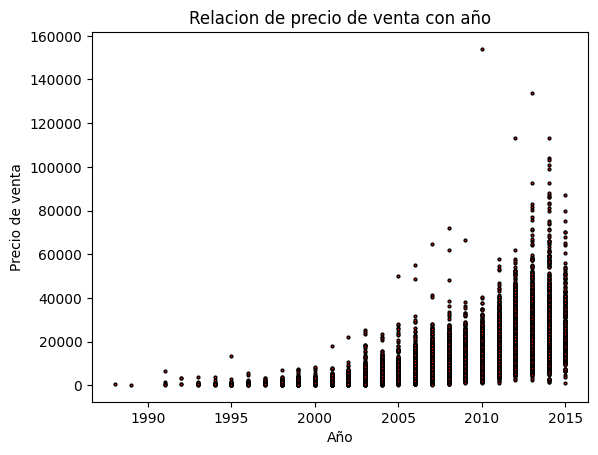

In [142]:
plotData(X_a, y_a)

In [143]:
# Importamos la clase de Regresión Lineal de scikit-learn
from sklearn.linear_model import LinearRegression

# para generar características polinómicas
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree = 3)    # usaremos polinomios de grado 3
print(X_a.shape)
X_a = pf.fit_transform(X_a.reshape(-1,1))  # transformamos la entrada en polinómica
print(X_a.shape)
regresion_lineal = LinearRegression() # creamos una instancia de LinearRegression

# instruimos a la regresión lineal que aprenda de los datos (ahora polinómicos) (X_a,y_a)
regresion_lineal.fit(X_a, y_a)

# vemos los parámetros que ha estimado la regresión lineal
print('theta = ' + str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_))

# resultado: w = [0 -4.54 4.95 0.1], b = -57.52

(19562,)
(19562, 4)
theta = [ 0.00000000e+00 -7.68926763e+06  3.77323984e+03 -6.16934662e-01], b = 5221054522.527449


In [144]:
from sklearn.metrics import mean_squared_error # importamos el cálculo del error cuadrático medio (MSE)
# Predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(X_a)
# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse = mean_squared_error(y_true = y_a, y_pred = prediccion_entrenamiento)
# La raíz cuadrada del MSE es el RMSE
rmse = np.sqrt(mse)
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))
# calculamos el coeficiente de determinación R2
r2 = regresion_lineal.score(X_a, y_a)
print('Coeficiente de Determinación R2 = ' + str(r2))

Error Cuadrático Medio (MSE) = 61568114.862399116
Raíz del Error Cuadrático Medio (RMSE) = 7846.535213863449
Coeficiente de Determinación R2 = 0.35132698900276926


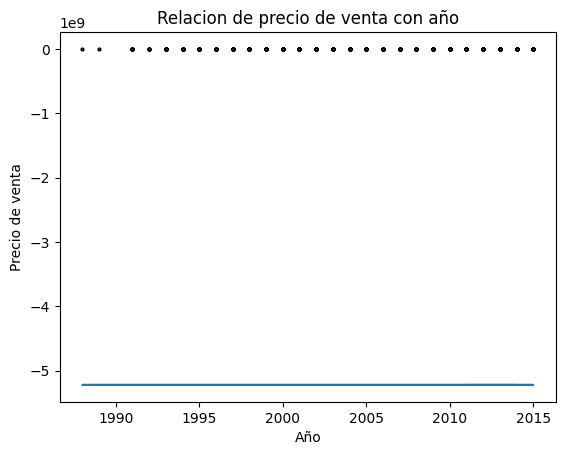

In [145]:
plotData(X_a[:,1], y_a)
pyplot.plot(X_a[:, 1], np.dot(X_a, regresion_lineal.coef_), '-')